In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

<h1> Research Questions </h1>

In [2]:
df = pd.read_pickle("./pickle/df_top100.pkl")
exman = pd.read_pickle("./pickle/exman_top50.pkl")
pomodoro = pd.read_pickle("./pickle/pomodoro_top50.pkl")

In [3]:
def normalize_data(data_input, normalizer, data_output, df):
    df[data_output] = df[data_input]/df[normalizer]*60

In [4]:
def get_comparison_summary(parameter):
    return pd.concat([pomodoro[parameter].describe(),exman[parameter].describe()],axis=1,keys=["pomodoro","exman"])

<h2>What is the effect of notification blocking and distraction discouragements during a user defined time period on their perceived productivity?</h2>


<h4>goals achieved</h4>

In [5]:
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", exman)
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", pomodoro)
normalize_data("goalsAchieved","minutesInFocus","goalsAchievedPerHour", df)

In [6]:
exman["goalsAchievedPerHour"].mean()

1.6127128160179658

In [7]:
pomodoro["goalsAchievedPerHour"].mean()

1.2548478500667868

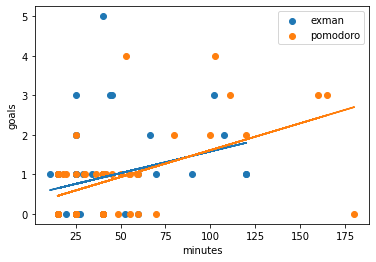

In [8]:
plt.scatter(exman["minutesInFocus"],exman["goalsAchieved"],label="exman")
plt.scatter(pomodoro["minutesInFocus"],pomodoro["goalsAchieved"], label="pomodoro")
plt.legend()

slope, intercept, r, p, stderr = scipy.stats.linregress(exman["minutesInFocus"], exman["goalsAchieved"])
plt.plot(exman["minutesInFocus"], intercept + slope * exman["minutesInFocus"])

slope, intercept, r, p, stderr = scipy.stats.linregress(pomodoro["minutesInFocus"], pomodoro["goalsAchieved"])
plt.plot(pomodoro["minutesInFocus"], intercept + slope * pomodoro["minutesInFocus"])

plt.xlabel("minutes")
plt.ylabel("goals")

plt.show()

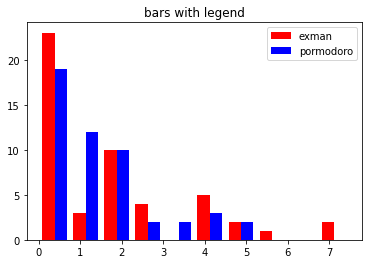

In [9]:
x = [list(exman["goalsAchievedPerHour"]),list(pomodoro["goalsAchievedPerHour"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [10]:
exman[["PSNR", "goalsAchieved", "goalsAchievedPerHour", "percentageCompletedGoals", "minutesInFocus"]].sort_values("goalsAchievedPerHour").tail(20)

,PSNR,goalsAchieved,goalsAchievedPerHour,percentageCompletedGoals,minutesInFocus
42,p06,1,1.500000,1.00,40.00
39,p06,1,1.500000,1.00,40.00
137,p09,1,1.748761,1.00,34.31
89,p07,3,1.763668,0.75,102.06
143,p09,2,1.808046,1.00,66.37
45,p06,1,2.049180,1.00,29.28
16,p01,1,2.400000,1.00,25.00
124,p08,1,2.400000,1.00,25.00
11,p01,1,2.400000,1.00,25.00
150,p09,1,2.400000,1.00,25.00


In [11]:
pomodoro[["PSNR", "goalsAchieved", "goalsAchievedPerHour", "percentageCompletedGoals", "minutesInFocus"]].sort_values("goalsAchievedPerHour").tail(20)

,PSNR,goalsAchieved,goalsAchievedPerHour,percentageCompletedGoals,minutesInFocus
161,p09,1,1.495513,1.00,40.12
101,p08,1,1.500000,1.00,40.00
103,p08,1,1.500000,1.00,40.00
47,p06,1,1.500000,1.00,40.00
46,p06,1,1.500000,1.00,40.00
212,p17,2,1.500000,0.33,80.00
25,p01,1,1.500000,1.00,40.00
20,p01,3,1.622938,1.00,110.91
56,p07,1,1.647899,1.00,36.41
57,p07,1,2.000000,1.00,30.00


In [12]:
print("exman: ",exman[ "minutesInFocus"].mean())
print("pomodoro: ",pomodoro[ "minutesInFocus"].mean())

exman:  39.7592
pomodoro:  50.50299999999999


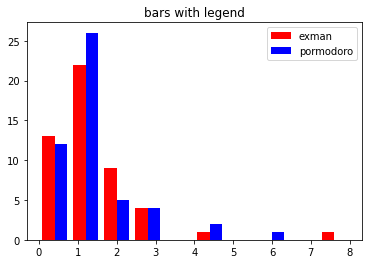

In [13]:
x = [list(exman["goalsSet"]),list(pomodoro["goalsSet"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [14]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["goalsAchievedPerHour"], pomodoro["goalsAchievedPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.2913036037227029 T-Statistic:1.0617768292830194


The p-value is significant. Therefore, the user was more effective using our app exman than using the pomodoro timer.

<h4>finished vs total Goals</h4>

In [15]:
exman["percentageCompletedGoals"].mean()

0.5539999999999999

In [16]:
pomodoro["percentageCompletedGoals"].mean()

0.58

In [17]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["percentageCompletedGoals"], pomodoro["percentageCompletedGoals"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.7864818715917798 T-Statistic:-0.2716248490563755


<h4> Broken Focus per hour </h4>

In [18]:
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", exman)
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", pomodoro)
normalize_data("brokenFocus","minutesInFocus","brokenFocusPerHour", df)

In [19]:
exman["brokenFocusPerHour"].mean()

0.5753303161443085

In [20]:
pomodoro["brokenFocusPerHour"].mean()

5.505408356865098

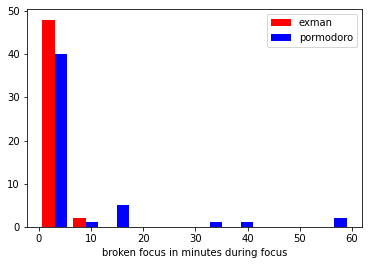

In [21]:
x = [list(exman["brokenFocusPerHour"]),list(pomodoro["brokenFocusPerHour"])]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})

plt.xlabel("broken focus in minutes during focus")

plt.show()

In [22]:
exman[["PSNR", "focusID", "scheduled", "brokenFocus", "brokenFocusPerHour", "nrOfBreaks", "minutesInFocus"]].sort_values("brokenFocusPerHour").tail(10)

,PSNR,focusID,scheduled,brokenFocus,brokenFocusPerHour,nrOfBreaks,minutesInFocus
7,p01,603df7e1-ba82-495e-ad4e-00fd7c87fe72,False,0.00,0.000000,0,15.00
17,p01,367f67a5-928d-4722-acc6-9e875640e1e3,False,0.00,0.000000,0,25.00
137,p09,_8513icq38gs30b9m6l33ib9k60o3eba28p13cba68cpje...,True,0.15,0.262314,1,34.31
225,p17,99cb53b0-40e8-4970-8ca5-f628d3dca1c9,False,1.62,0.903262,3,107.61
183,p11,719e4219-41c6-4750-a8e7-dd62e25080cb,False,0.84,1.260000,1,40.00
169,p10,40335a80-5d91-4833-8b1c-5ed2dfac9a6d,False,1.27,1.731818,3,44.00
39,p06,2d7bd4d9-e880-4ea9-9bde-a3ae1ce6b4ec,False,1.77,2.655000,1,40.00
174,p10,8d1a45c2-4db1-48b2-af0c-ccd0d5aea3d0,False,2.04,4.896000,1,25.00
41,p06,66b0c95e-d104-40b6-8220-f428b01a0063,False,6.59,7.563122,1,52.28
40,p06,df1eabfa-1aa7-48eb-8bad-0c4b34931335,False,6.33,9.495000,1,40.00


In [23]:
pomodoro[["PSNR", "focusID", "scheduled", "brokenFocus", "brokenFocusPerHour", "nrOfBreaks", "minutesInFocus"]].sort_values("brokenFocusPerHour").tail(20)

,PSNR,focusID,scheduled,brokenFocus,brokenFocusPerHour,nrOfBreaks,minutesInFocus
206,p12,44d2ecac-43b9-4d97-a7dc-dfcae0263ad3,False,0.00,0.000000,0,48.49
20,p01,25f3ce1d-e67f-472a-a475-f8d4142d714e,False,0.00,0.000000,0,110.91
18,p01,1adb005c-9585-4c60-96ab-a5b187ce04b0,False,0.00,0.000000,0,25.00
203,p12,a57bfe87-eaab-4023-b352-9d31aa7b93a0,False,0.00,0.000000,0,25.00
157,p09,53157446-81d9-44ba-acd4-63489066a7c6,False,0.00,0.000000,0,15.00
186,p11,de162c05-0876-440d-8203-d7bc92b92d91,False,0.19,0.285000,1,40.00
34,p02,279e8657-e394-48da-bb02-f84df29e4791,False,0.22,0.725275,1,18.20
214,p17,24b945f7-5136-4b3d-87e8-f48d80490ce9,False,3.77,1.370909,3,165.00
159,p09,cb060b11-61df-4165-a273-0e15c949206a,False,0.37,1.480000,1,15.00
161,p09,92ef0f2c-dd68-4e55-b82a-91c0e06daa6c,False,1.12,1.674975,1,40.12


In [24]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFocusPerHour"], pomodoro["brokenFocusPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.014436330220085952 T-Statistic:-2.5331108580262875


In [25]:
print("exman: ",exman["brokenFocusPerHour"].mean())
print("pomodoro: ", pomodoro[pomodoro["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour'].mean())


exman:  0.5753303161443085
pomodoro:  1.5654722483686274


In [26]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFocusPerHour"], pomodoro[pomodoro["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour'], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.15375764389680488 T-Statistic:-1.4450552173930735


In [27]:
print("exman: ", exman[exman["brokenFocus"] == 0]['brokenFocus'].count() / exman["brokenFocus"].count())
print("pomodoro: ", pomodoro[pomodoro["brokenFocus"] == 0]['brokenFocus'].count() / pomodoro["brokenFocus"].count())

exman:  0.84
pomodoro:  0.7


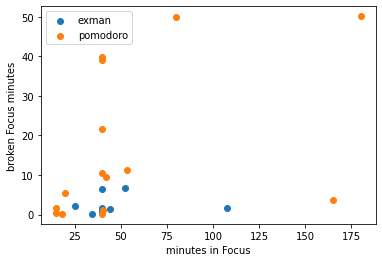

In [28]:
plt.scatter(exman[exman["brokenFocus"] != 0]['minutesInFocus'],exman[exman["brokenFocus"] != 0]['brokenFocus'],label="exman")
plt.scatter(pomodoro[pomodoro["brokenFocus"] != 0]['minutesInFocus'],pomodoro[pomodoro["brokenFocus"] != 0]['brokenFocus'], label="pomodoro")
plt.xlabel("minutes in Focus")
plt.ylabel("broken Focus minutes")
plt.legend()

<h4> broken focus frequency </h4>


In [29]:
normalize_data("nrOfBreaks","minutesInFocus","brokenFrequencyPerHour", exman)
normalize_data("nrOfBreaks","minutesInFocus","brokenFrequencyPerHour", pomodoro)

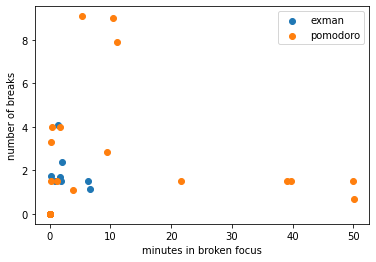

In [30]:
plt.scatter(exman["brokenFocus"],exman["brokenFrequencyPerHour"],label="exman")
plt.scatter(pomodoro["brokenFocus"],pomodoro["brokenFrequencyPerHour"], label="pomodoro")
plt.xlabel("minutes in broken focus")
plt.ylabel("number of breaks")
plt.legend()

In [31]:
exman["brokenFrequencyPerHour"].mean()

0.3112008758822615

In [32]:
pomodoro["brokenFrequencyPerHour"].mean()

1.0172620542591282

In [33]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["brokenFrequencyPerHour"], pomodoro["brokenFrequencyPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.03792896436883339 T-Statistic:-2.121229201456923


The effect on frequency of breaks is not significant, but the difference of the break duration between pomodoro and exman is significant on a 5% level. Reason for that not known yet.

<h4>distraction time </h4>

In [34]:
normalize_data("distractionTime","minutesInFocus","distractionTimePerHour",exman)
normalize_data("distractionTime","minutesInFocus","distractionTimePerHour",pomodoro)

In [35]:
exman["distractionTimePerHour"].mean()

2.2505913801496478

In [36]:
pomodoro["distractionTimePerHour"].mean()

1.220471840011058

In [37]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["distractionTimePerHour"], pomodoro["distractionTimePerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.4294185060117386 T-Statistic:0.7950811969934009


Not significant

<h4> Productivity Rating </h4>

In [38]:
exman_rating = exman.dropna(subset=["rating"])
pomodoro_rating = pomodoro.dropna(subset=["rating"])

In [39]:
print("exman: ",exman_rating['rating'].astype(int).mean())
print("pomodoro: ",pomodoro_rating['rating'].astype(int).mean())

exman:  5.886363636363637
pomodoro:  5.568181818181818


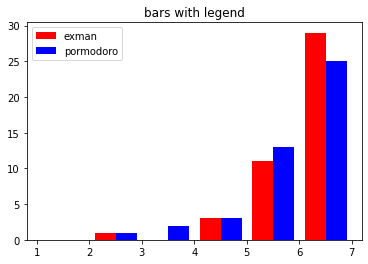

In [40]:
bins = [1,2,3,4,5,6,7]
x = [list(exman_rating["rating"].astype(int)),list(pomodoro_rating["rating"].astype(int))]

label = ["exman","pormodoro"]
colors = ['red', 'blue']
plt.hist(x, bins, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [41]:
tStat, pValue = stats.ttest_ind(exman_rating["rating"].astype(int), pomodoro_rating["rating"].astype(int), equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.2007568377434471 T-Statistic:1.2893127689484705


The p-Value and the t-test is not significant. Therefore, we cannot assume, that exman provides an improvement of the productivity compared to the pomodoro baseline.

<h4>nr of notifications vs rating</h4>


In [42]:
np.corrcoef(exman_rating["messagesReceivedInFocus"],exman_rating["rating"].astype(int))[0][1]

-0.3754864541660542

In [43]:
np.corrcoef(pomodoro_rating["messagesReceivedInFocus"],pomodoro_rating["rating"].astype(int))[0][1]

0.11083806417225477

<h2> General Stats </h2>

In [44]:
pd.concat([
    df[df.PSNR == "p01"]["appVersion"].describe(),
    df[df.PSNR == "p02"]["appVersion"].describe(),
    df[df.PSNR == "p06"]["appVersion"].describe(),
    df[df.PSNR == "p07"]["appVersion"].describe(),
    df[df.PSNR == "p08"]["appVersion"].describe(),
    df[df.PSNR == "p09"]["appVersion"].describe(),
    df[df.PSNR == "p10"]["appVersion"].describe(),
    df[df.PSNR == "p11"]["appVersion"].describe(),
    df[df.PSNR == "p12"]["appVersion"].describe(),
    df[df.PSNR == "p17"]["appVersion"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p06,p09,p12,p17,p01,p08,p11,p02,p10
count,17,1,10,11,12,17,6,3,13,10
unique,2,1,2,2,2,2,1,2,2,2
top,exman,pomodoro,exman,pomodoro,pomodoro,pomodoro,exman,exman,exman,pomodoro
freq,11,1,5,8,7,9,6,2,7,7


Focus sessions are mostly evenly distributed for pomodoro and exman (except maybe for p01)

<h4> notification per focus per hour </h4>

In [45]:
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",exman)
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",pomodoro)
normalize_data("messagesReceivedInFocus","minutesInFocus","messagesPerHour",df)

In [46]:
df["messagesPerHour"].describe()

count    100.000000
mean       5.486602
std        7.040636
min        0.000000
25%        1.500000
50%        3.000000
75%        6.000000
max       39.436620
Name: messagesPerHour, dtype: float64

In [47]:
pd.concat([
    df[df.PSNR == "p01"]["messagesPerHour"].describe(),
    df[df.PSNR == "p02"]["messagesPerHour"].describe(),
    df[df.PSNR == "p06"]["messagesPerHour"].describe(),
    df[df.PSNR == "p07"]["messagesPerHour"].describe(),
    df[df.PSNR == "p08"]["messagesPerHour"].describe(),
    df[df.PSNR == "p09"]["messagesPerHour"].describe(),
    df[df.PSNR == "p10"]["messagesPerHour"].describe(),
    df[df.PSNR == "p11"]["messagesPerHour"].describe(),
    df[df.PSNR == "p12"]["messagesPerHour"].describe(),
    df[df.PSNR == "p17"]["messagesPerHour"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p06,p09,p12,p17,p01,p08,p11,p02,p10
count,17.000000,1.000000,10.000000,11.000000,12.000000,17.000000,6.000000,3.000000,13.000000,10.000000
mean,11.283765,16.483516,3.549218,0.670423,4.233333,6.077403,5.893775,5.500000,5.818259,1.587002
std,9.877274,NaN,5.318562,1.253918,2.794258,9.154299,5.451780,0.866025,5.234607,0.841022
min,1.168338,16.483516,0.000000,0.000000,1.000000,0.333333,2.205072,4.500000,1.237369,0.363636
25%,4.000000,16.483516,0.375000,0.000000,1.500000,2.400000,3.022727,5.250000,2.400000,1.004108
50%,8.000000,16.483516,2.524590,0.000000,4.000000,3.078502,4.445455,6.000000,4.000000,1.750000
75%,18.000000,16.483516,3.332249,0.799249,6.300000,4.800000,4.800000,6.000000,7.200000,2.136364
max,31.200000,16.483516,18.000000,4.012483,9.000000,39.436620,16.800000,6.000000,20.000000,3.000000


<h4> Autoreplies </h4>

In [48]:
exman["autoReplied"].sum()

6

<h4> Broken Focus measurement in minutes </h4>

In [49]:
get_comparison_summary("brokenFocusPerHour")

,pomodoro,exman
count,50.000000,50.000000
mean,5.505408,0.575330
std,13.637488,1.847762
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.209500,0.000000
max,59.595000,9.495000


<h4> number of breaks per focus sessions per Hour </h4>

In [50]:
get_comparison_summary("brokenFrequencyPerHour")

,pomodoro,exman
count,50.000000,50.000000
mean,1.017262,0.311201
std,2.212509,0.802757
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.394362,0.000000
max,9.077156,4.090909


<h4> Minutes in focus </h4>

In [51]:
df["minutesInFocus"].describe()

count    100.000000
mean      45.131100
std       33.775129
min       10.650000
25%       25.000000
50%       40.000000
75%       52.540000
max      180.000000
Name: minutesInFocus, dtype: float64

In [52]:
pd.concat([
    df[df.PSNR == "p01"]["minutesInFocus"].describe(),
    df[df.PSNR == "p02"]["minutesInFocus"].describe(),
    df[df.PSNR == "p06"]["minutesInFocus"].describe(),
    df[df.PSNR == "p07"]["minutesInFocus"].describe(),
    df[df.PSNR == "p08"]["minutesInFocus"].describe(),
    df[df.PSNR == "p09"]["minutesInFocus"].describe(),
    df[df.PSNR == "p10"]["minutesInFocus"].describe(),
    df[df.PSNR == "p11"]["minutesInFocus"].describe(),
    df[df.PSNR == "p12"]["minutesInFocus"].describe(),
    df[df.PSNR == "p17"]["minutesInFocus"].describe()
],axis=1, keys= df.PSNR.unique())

,p07,p06,p09,p12,p17,p01,p08,p11,p02,p10
count,17.000000,1.0,10.000000,11.000000,12.000000,17.000000,6.000000,3.0,13.000000,10.000000
mean,35.212941,18.2,37.656000,74.759091,36.250000,44.277647,31.868333,40.0,24.499231,87.996000
std,28.554992,NaN,9.636582,42.566921,15.539539,39.692797,9.826903,0.0,8.408924,38.187426
min,15.000000,18.2,15.000000,29.540000,15.000000,10.650000,25.000000,40.0,15.000000,53.320000
25%,15.000000,18.2,40.000000,40.705000,25.000000,19.830000,25.000000,40.0,25.000000,59.272500
50%,25.000000,18.2,40.000000,55.000000,40.000000,40.000000,26.105000,40.0,25.000000,70.000000
75%,40.000000,18.2,40.000000,101.030000,42.500000,41.970000,39.802500,40.0,25.000000,116.902500
max,110.910000,18.2,52.280000,160.000000,60.000000,180.000000,45.000000,40.0,48.490000,165.000000


<h4> distraction count per participant and per focus session </h4>

In [70]:
pd.concat([
    df[df.PSNR == "p01"]["distractionCount"].describe(),
    #df[df.PSNR == "p02"]["distractionCount"].describe(),
    #df[df.PSNR == "p06"]["distractionCount"].describe(),
    #df[df.PSNR == "p07"]["distractionCount"].describe(),
    df[df.PSNR == "p08"]["distractionCount"].describe(),
    df[df.PSNR == "p09"]["distractionCount"].describe(),
    df[df.PSNR == "p10"]["distractionCount"].describe(),
    df[df.PSNR == "p11"]["distractionCount"].describe(),
    df[df.PSNR == "p12"]["distractionCount"].describe()
    #df[df.PSNR == "p17"]["distractionCount"].describe()
],axis=1, keys= ["p01", "p08", "p09", "p10", "p11", "p12"])


,p01,p08,p09,p10,p11,p12
count,17.000000,12.000000,17.000000,6.000000,3.000000,13.000000
mean,0.352941,1.916667,7.529412,2.833333,2.333333,1.692308
std,1.057188,4.033008,12.207158,5.115336,1.527525,4.366246
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.500000,0.000000
50%,0.000000,0.000000,3.000000,0.500000,2.000000,0.000000
75%,0.000000,1.500000,6.000000,2.500000,3.000000,1.000000
max,4.000000,14.000000,44.000000,13.000000,4.000000,16.000000


In [71]:
pd.concat([
    df[df.PSNR == "p01"]["distractionTime"].describe(),
    #df[df.PSNR == "p02"]["distractionTime"].describe(),
    #df[df.PSNR == "p06"]["distractionTime"].describe(),
    #df[df.PSNR == "p07"]["distractionTime"].describe(),
    df[df.PSNR == "p08"]["distractionTime"].describe(),
    df[df.PSNR == "p09"]["distractionTime"].describe(),
    df[df.PSNR == "p10"]["distractionTime"].describe(),
    df[df.PSNR == "p11"]["distractionTime"].describe(),
    df[df.PSNR == "p12"]["distractionTime"].describe(),
    #df[df.PSNR == "p17"]["distractionTime"].describe()
],axis=1, keys=["p01", "p08", "p09", "p10", "p11", "p12"])

# clear p2,p6,p7 and p17 out of the windowstracking dataframe

,p01,p08,p09,p10,p11,p12
count,17.000000,12.000000,17.000000,6.000000,3.000000,13.000000
mean,0.055022,1.375862,3.604226,1.006769,0.557844,0.666897
std,0.166221,3.273296,8.699062,1.696751,0.436864,2.183049
min,0.000000,0.000000,0.000000,0.000000,0.067117,0.000000
25%,0.000000,0.000000,0.030583,0.000000,0.384567,0.000000
50%,0.000000,0.000000,0.360900,0.016667,0.702017,0.000000
75%,0.000000,0.516975,2.909100,1.434108,0.803208,0.098300
max,0.635133,11.209250,35.883900,4.106250,0.904400,7.920617


<h4> Rating </h4>

In [55]:
pd.concat([pomodoro["rating"].dropna().astype(int).describe(),exman["rating"].dropna().astype(int).describe()],axis=1,keys=["pomodoro","exman"])

,pomodoro,exman
count,44.000000,44.000000
mean,5.568182,5.886364
std,1.189053,1.125103
min,2.000000,2.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,7.000000
max,7.000000,7.000000


In [74]:
# productivity per version and participants needs to be fixed
pd.concat([
    df[df.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    #df[df.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    df[df.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= ["p01","p02","p06","p07", "p08", "p09", "p10", "p12","p17"])

,p01,p02,p06,p07,p08,p09,p10,p12,p17
count,14.00000,1.0,9.000000,10.000000,12.000000,15.000000,5.000000,12.000000,10.000000
mean,5.50000,5.0,3.666667,5.100000,6.666667,6.466667,6.000000,6.000000,5.900000
std,0.85485,NaN,1.224745,0.567646,0.651339,0.833809,0.707107,0.426401,1.100505
min,4.00000,5.0,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000
25%,5.00000,5.0,3.000000,5.000000,6.750000,6.000000,6.000000,6.000000,5.000000
50%,6.00000,5.0,4.000000,5.000000,7.000000,7.000000,6.000000,6.000000,6.000000
75%,6.00000,5.0,5.000000,5.000000,7.000000,7.000000,6.000000,6.000000,7.000000
max,7.00000,5.0,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000


P17 has pretty low average productivity rating compared to others. Potential explanations from interview?

In [81]:
# productivity per version and participants needs to be fixed
pd.concat([
    exman_rating[exman_rating.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    #exman_rating[exman_rating.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    exman_rating[exman_rating.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= ["p01","p06","p07", "p08", "p09", "p10","p17"])

,p01,p06,p07,p08,p09,p10,p17
count,11.000000,4.000000,3.0,5.0,7.000000,5.000000,3.0
mean,5.363636,4.000000,5.0,7.0,6.714286,6.000000,7.0
std,0.924416,1.414214,0.0,0.0,0.487950,0.707107,0.0
min,4.000000,2.000000,5.0,7.0,6.000000,5.000000,7.0
25%,5.000000,3.500000,5.0,7.0,6.500000,6.000000,7.0
50%,5.000000,4.500000,5.0,7.0,7.000000,6.000000,7.0
75%,6.000000,5.000000,5.0,7.0,7.000000,6.000000,7.0
max,7.000000,5.000000,5.0,7.0,7.000000,7.000000,7.0


In [58]:
# productivity per version and participants needs to be fixed
pd.concat([
    pomodoro_rating[pomodoro_rating.PSNR == "p01"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p02"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p06"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p07"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p08"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p09"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p10"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p11"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p12"]["rating"].dropna().astype(int).describe(),
    pomodoro_rating[pomodoro_rating.PSNR == "p17"]["rating"].dropna().astype(int).describe()
],axis=1, keys= df.PSNR.unique())

,p07,p06,p09,p12,p17,p01,p08,p11,p02,p10
count,3.0,1.0,5.000000,7.000000,7.000000,8.000000,0.0,0.0,6.0,7.000000
mean,6.0,5.0,3.400000,5.142857,6.428571,6.250000,NaN,NaN,6.0,5.428571
std,0.0,NaN,1.140175,0.690066,0.786796,1.035098,NaN,NaN,0.0,0.975900
min,6.0,5.0,2.000000,4.000000,5.000000,5.000000,NaN,NaN,6.0,4.000000
25%,6.0,5.0,3.000000,5.000000,6.000000,5.000000,NaN,NaN,6.0,5.000000
50%,6.0,5.0,3.000000,5.000000,7.000000,7.000000,NaN,NaN,6.0,5.000000
75%,6.0,5.0,4.000000,5.500000,7.000000,7.000000,NaN,NaN,6.0,6.000000
max,6.0,5.0,5.000000,6.000000,7.000000,7.000000,NaN,NaN,6.0,7.000000


In [59]:
df[df["brokenFocusPerHour"] < 16.5]['brokenFocusPerHour']

p1_rating = df[df.PSNR == "p01"]["rating"].dropna().astype(int)
p7_rating = df[df.PSNR == "p07"]["rating"].dropna().astype(int)
p8_rating = df[df.PSNR == "p08"]["rating"].dropna().astype(int)

p1_broken = df[df.PSNR == "p01"]["percentageCompletedGoals"].dropna().astype(int)
p7_broken = df[df.PSNR == "p07"]["percentageCompletedGoals"].dropna().astype(int)
p8_broken = df[df.PSNR == "p08"]["percentageCompletedGoals"].dropna().astype(int)

#filter for the best results

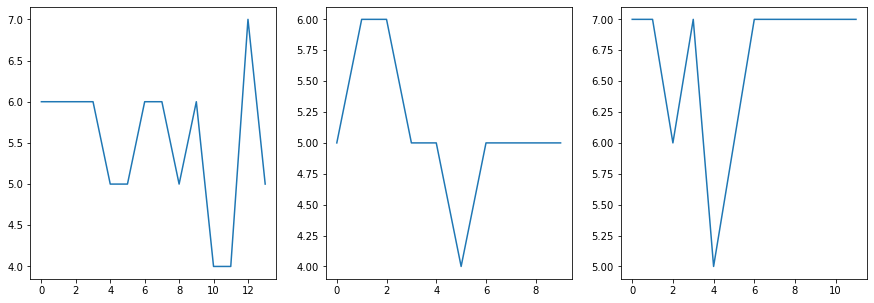

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.plot([i for i in range(len(p1_rating))],p1_rating)
ax2.plot([i for i in range(len(p7_rating))],p7_rating)
ax3.plot([i for i in range(len(p8_rating))],p8_rating)

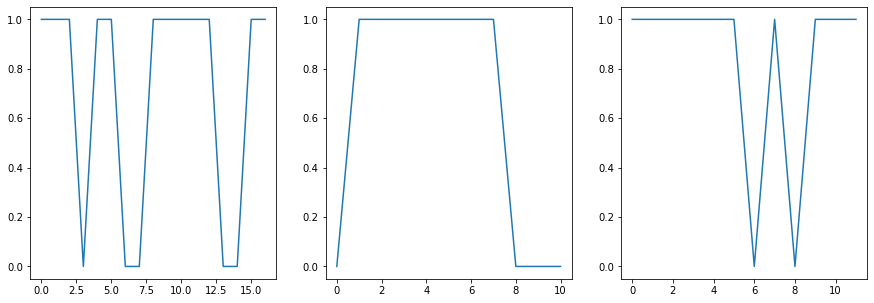

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.plot([i for i in range(len(p1_broken))],p1_broken)
ax2.plot([i for i in range(len(p7_broken))],p7_broken)
ax3.plot([i for i in range(len(p8_broken))],p8_broken)

#look at the dates do a plot to do frequency of focus session per date

Overall participants have consistent behaviour over the study duration.

In [62]:
exman_p1 = exman_rating[exman_rating.PSNR == "p01" ]["percentageCompletedGoals"].astype(int)
exman_p9 = exman_rating[exman_rating.PSNR == "p09"]["percentageCompletedGoals"].astype(int)
exman_p12 = exman_rating[exman_rating.PSNR == "p12"]["percentageCompletedGoals"].astype(int)

pomodoro_p1 = pomodoro_rating[pomodoro_rating.PSNR == "p01"]["percentageCompletedGoals"].astype(int)
pomodoro_p9 = pomodoro_rating[pomodoro_rating.PSNR == "p09"]["percentageCompletedGoals"].astype(int)
pomodoro_p12 = pomodoro_rating[pomodoro_rating.PSNR == "p12"]["percentageCompletedGoals"].astype(int)

In [63]:
tStat, pValue = stats.ttest_ind(exman_p1, pomodoro_p1, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.037928971445557756 T-Statistic:-2.390457218668787


In [64]:
tStat, pValue = stats.ttest_ind(exman_p9, pomodoro_p9, equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.15648525797964158 T-Statistic:1.5075567228888178
